# This is a short demo that demonstrates the use of the functions in this repo

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
# Need to disable the annoying Pandas warnings that were added in 0.20...
import matplotlib
%matplotlib inline  

# Load the data
You can find historical bitcoin data in here: https://www.kaggle.com/mczielinski/bitcoin-historical-data/data
please note that currently the code was tested only on Bitstamp data.
for the this demo we will use a small sample of data.

In [2]:
from data_handling import get_OHLC_data_from_file
directory_path = 'data'
file_name = 'OHLC_sample.csv'

df = get_OHLC_data_from_file(directory_path, file_name)

Data loaded from file. 2633 sampels.


In [3]:
df.head(5)

,Timestamp,Datestamp,Open,Close,Low,High,Volume_(BTC),Buy_Sell,Account_Value
0,1506713580,2017-09-29 19:33:00,4166.81,4169.26,4166.81,4169.28,1.400032,0,4169.26
1,1506713640,2017-09-29 19:34:00,4169.43,4158.20,4157.13,4169.43,11.252167,0,4158.20
2,1506713700,2017-09-29 19:35:00,4167.80,4158.94,4158.94,4167.80,0.545765,0,4158.94
3,1506713760,2017-09-29 19:36:00,4166.77,4157.98,4157.88,4166.77,0.049650,0,4157.98
4,1506713820,2017-09-29 19:37:00,4166.27,4165.00,4157.52,4166.29,0.305186,0,4165.00


# Plot OHLC
We can use the plot_OHLC function to quickly plot the data and add overlays. in the future more ovelays will be added, you can easily create your own overlay function and add it to the plot. 


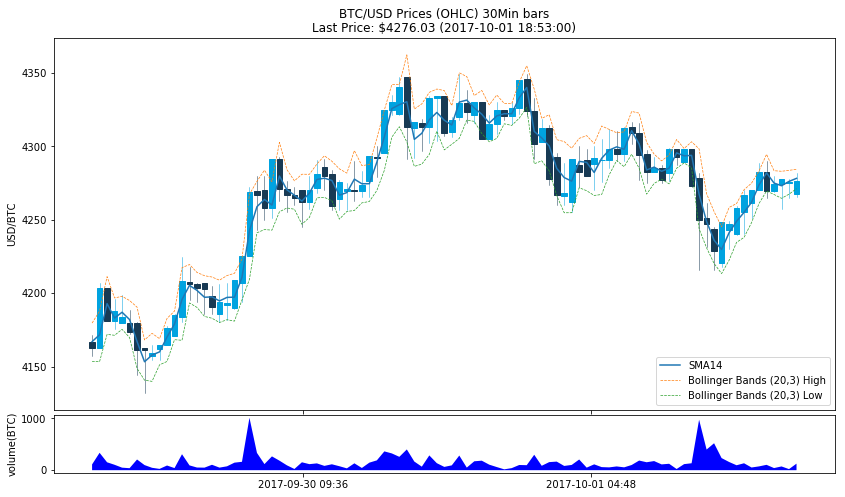

In [4]:
from plotting import plot_OHLC, SMA_overlay, BBands_overlay, buy_sell_overlay
plot_OHLC(df, '30Min', overlays=[(SMA_overlay,14),(BBands_overlay,20,3)])
    

# Customize and test a trading strategy
You can run a custom made bot trading strategy and evaluate its performance.
inside trade_strategies.py you can find a template for trade strategy creation that will fit with the rest of the code.

In [5]:
from trade_strategies import hindsight_trade_strategy 
# This is dummy strategy, it gives ideal buy/sell decision based on future behavior,can only work on old data that was collected 
# (or if you know how to see into the future)
df = hindsight_trade_strategy(df, start=1, sensitivity=0.7) 

Current holdings:  4583.30756182 USDs


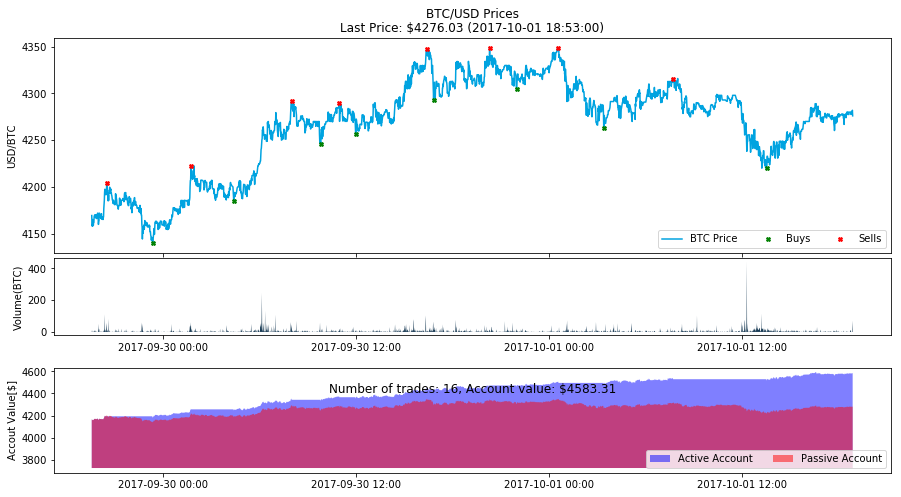

In [6]:
from plotting import plot_trade_strategy
plot_trade_strategy(df)

We also have the abilty to take the latest tick data using the Bitstamp public api
https://www.bitstamp.net/market/tradeview/

Current holdings:  4305.0 USDs


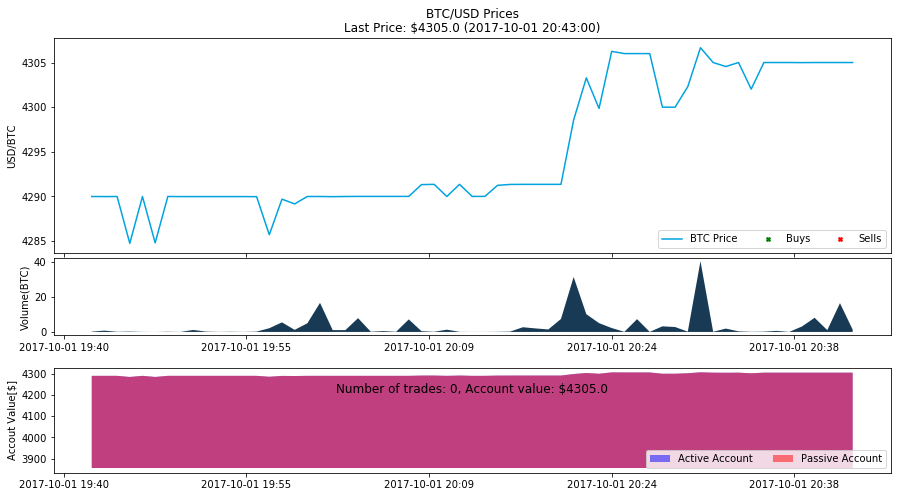

In [8]:
from data_handling import get_latest_Bitstamp_ticks, convert_tick_to_OHLC

df = get_latest_Bitstamp_ticks()
df = convert_tick_to_OHLC(df, resample_size='1Min')
df = hindsight_trade_strategy(df, start=1) 

plot_trade_strategy(df)